In [1]:
# 데이터 가공 모듈
import numpy as np
from pandas import DataFrame

# 데이터 가시화 모듈
import matplotlib.pyplot as plt
%matplotlib inline

# 기계학습 모듈
from sklearn import linear_model
from sklearn.datasets import load_boston
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 소수점 3째짜리까지 표시
%precision 3

'%.3f'

In [2]:
## 데이터 준비
# 보스턴 데이터 셋 임포트
boston = load_boston()

# 설명변수들을 DataFrame으로 변환
df = DataFrame(boston.data, columns = boston.feature_names)

# 목적변수를 DataFrame에 추가
df['MEDV'] = np.array(boston.target)

In [3]:
# 최초 5행을 표시
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# 오브젝트 생성
model = linear_model.Ridge()

# fit함수에서 파라미터 추정
model.fit(boston.data,boston.target)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [5]:
# 회귀계수를 출력
print(model.coef_)
print(model.intercept_)

[-1.046e-01  4.744e-02 -8.805e-03  2.552e+00 -1.078e+01  3.854e+00
 -5.415e-03 -1.373e+00  2.901e-01 -1.291e-02 -8.761e-01  9.673e-03
 -5.333e-01]
31.59766981827401


In [6]:
# 75%를 학습용, 25%를 검증용 데이터로 하기 위해 분할
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.25, random_state = 100)

# 학습용 데이터에서 파라미터 추정
model.fit(X_train, y_train)

# 작성한 모델로부터 예측(학습용, 검증용 모델 사용)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

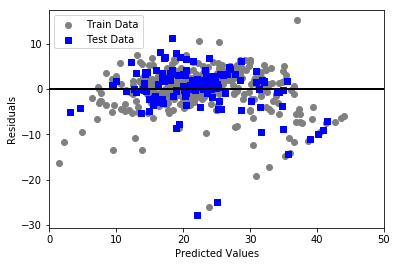

In [7]:
# 학습용, 검증용 각각에서 잔차를 플롯
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'gray', marker = 'o', label = 'Train Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'blue', marker = 's', label = 'Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# 범례를 왼쪽 위에 표시
plt.legend(loc = 'upper left')

# y = 0의 직선을 그림
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'black')
plt.xlim([0, 50])
plt.show()

In [8]:
# 학습용, 검증용 데이터에 대하여 평균제곱오차를 출력
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

# 학습용, 검증용 데이터에 대하여 R^2를 출력
print('R^2 Train : %.3f, Test : %.3f' % (model.score(X_train, y_train), model.score(X_test, y_test)))

MSE Train : 20.632, Test : 27.977
R^2 Train : 0.741, Test : 0.716


## 참고 자료
- http://tekenuko.hatenablog.com/entry/2016/09/19/151547